<a href="https://colab.research.google.com/github/adamgrzanek/Pumpkin_Seeds/blob/main/projekt_ag__Pumpkin_Seeds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Model przewidujący klasę pestek dyni

https://www.kaggle.com/datasets/muratkokludataset/pumpkin-seeds-dataset

### Spis treści:
1. [Import bibliotek](#0)
2. [Wczytanie danych i utworzenie kopii](#1)
3. [Eksplorcja i wstępne przygotowanie danych](#2)
4. [Podział danych na zbiór treningowy i testowy](#3)
5. [Model SVM](#4)
6. [TensorFlow](#5)


### <a name='0'></a> Import bibliotek

In [ ]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
sns.set()

### <a name='1'></a> Wczytanie danych i utworzenie kopii

In [ ]:
# dla pliku w formacie 'arff'

# from scipy.io import arff
# import pandas as pd

# data_arff = arff.loadarff('Pumpkin_Seeds_Dataset.arff')
# df_arff = pd.DataFrame(data_arff[0])

# df_arff.head()
# # to samo co Pumpkin_Seeds_Dataset.xlsx

In [ ]:
df_raw = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df = df_raw.copy()
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


### <a name='2'></a> Eksplorcja i wstępne przygotowanie danych

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Area               2500 non-null   int64  
 1   Perimeter          2500 non-null   float64
 2   Major_Axis_Length  2500 non-null   float64
 3   Minor_Axis_Length  2500 non-null   float64
 4   Convex_Area        2500 non-null   int64  
 5   Equiv_Diameter     2500 non-null   float64
 6   Eccentricity       2500 non-null   float64
 7   Solidity           2500 non-null   float64
 8   Extent             2500 non-null   float64
 9   Roundness          2500 non-null   float64
 10  Aspect_Ration      2500 non-null   float64
 11  Compactness        2500 non-null   float64
 12  Class              2500 non-null   object 
dtypes: float64(10), int64(2), object(1)
memory usage: 254.0+ KB


In [ ]:
# podstawowe statystyki
df.describe()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
count,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000,2500.000000
mean,80658.220800,1130.279015,456.601840,225.794921,81508.084400,319.334230,0.860879,0.989492,0.693205,0.791533,2.041702,0.704121
std,13664.510228,109.256418,56.235704,23.297245,13764.092788,26.891920,0.045167,0.003494,0.060914,0.055924,0.315997,0.053067
min,47939.000000,868.485000,320.844600,152.171800,48366.000000,247.058400,0.492100,0.918600,0.468000,0.554600,1.148700,0.560800
25%,70765.000000,1048.829750,414.957850,211.245925,71512.000000,300.167975,0.831700,0.988300,0.658900,0.751900,1.801050,0.663475
50%,79076.000000,1123.672000,449.496600,224.703100,79872.000000,317.305350,0.863700,0.990300,0.713050,0.797750,1.984200,0.707700
75%,89757.500000,1203.340500,492.737650,240.672875,90797.750000,338.057375,0.897025,0.991500,0.740225,0.834325,2.262075,0.743500
max,136574.000000,1559.450000,661.911300,305.818000,138384.000000,417.002900,0.948100,0.994400,0.829600,0.939600,3.144400,0.904900


In [ ]:
# spr rozkładu zmiennej Class 
df['Class'].value_counts()

Çerçevelik       1300
Ürgüp Sivrisi    1200
Name: Class, dtype: int64

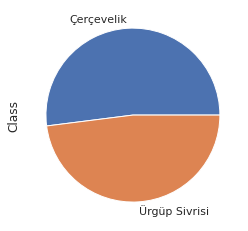

In [ ]:
df['Class'].value_counts().plot(kind='pie')

In [ ]:
# zmiana typu danych na kategoryczne
df['Class'] = df['Class'].astype('category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   Area               2500 non-null   int64   
 1   Perimeter          2500 non-null   float64 
 2   Major_Axis_Length  2500 non-null   float64 
 3   Minor_Axis_Length  2500 non-null   float64 
 4   Convex_Area        2500 non-null   int64   
 5   Equiv_Diameter     2500 non-null   float64 
 6   Eccentricity       2500 non-null   float64 
 7   Solidity           2500 non-null   float64 
 8   Extent             2500 non-null   float64 
 9   Roundness          2500 non-null   float64 
 10  Aspect_Ration      2500 non-null   float64 
 11  Compactness        2500 non-null   float64 
 12  Class              2500 non-null   category
dtypes: category(1), float64(10), int64(2)
memory usage: 237.1 KB


In [ ]:
# sprawdzenie czy są duplikaty
len(df[df.duplicated()])

0

In [ ]:
# spr czy są braki danych w każdej kolumnie
df.isnull().sum()#.sum()

Area                 0
Perimeter            0
Major_Axis_Length    0
Minor_Axis_Length    0
Convex_Area          0
Equiv_Diameter       0
Eccentricity         0
Solidity             0
Extent               0
Roundness            0
Aspect_Ration        0
Compactness          0
Class                0
dtype: int64

In [ ]:
df.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

### <a name='7'></a> Standaryzacja - StandardScaler

In [ ]:
# potrzebna lista kolumn numerycznych
df.dtypes

Area                    int64
Perimeter             float64
Major_Axis_Length     float64
Minor_Axis_Length     float64
Convex_Area             int64
Equiv_Diameter        float64
Eccentricity          float64
Solidity              float64
Extent                float64
Roundness             float64
Aspect_Ration         float64
Compactness           float64
Class                category
dtype: object

In [ ]:
#num_cols = [col for col in df.columns if df[col].dtype == 'float' or df[col].dtype == 'int']
num_cols = [col for col in df.columns if df[col].dtype in ['float', 'int']]
num_cols

['Area',
 'Perimeter',
 'Major_Axis_Length',
 'Minor_Axis_Length',
 'Convex_Area',
 'Equiv_Diameter',
 'Eccentricity',
 'Solidity',
 'Extent',
 'Roundness',
 'Aspect_Ration',
 'Compactness']

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df[num_cols] = scaler.fit_transform(df[num_cols]) # kilka kolumn jednocześnie
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280,Çerçevelik
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230,Çerçevelik
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483,Çerçevelik
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447,Çerçevelik
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166,Çerçevelik
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.074750,0.864479,1.361498,-1.518003,-0.081902,-0.033672,1.619204,0.345960,-3.356315,-2.223692,2.398914,-2.013344,Ürgüp Sivrisi
2496,-0.805987,-0.420755,0.112758,-1.458572,-0.820566,-0.801398,1.089955,0.689514,-1.527131,-0.842970,1.176505,-1.146340,Ürgüp Sivrisi
2497,0.536956,0.732689,0.900287,-0.154887,0.522763,0.572244,0.844154,0.718144,1.167385,-0.655177,0.763128,-0.833465,Ürgüp Sivrisi
2498,-0.047375,0.482155,0.805782,-0.903370,-0.044043,-0.005893,1.154174,-0.140743,0.725688,-1.306191,1.296467,-1.285814,Ürgüp Sivrisi


### Konwersja zmiennej docelowej (LabelEncoder)

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df['Class'] = le.fit_transform(df['Class'])

In [ ]:
df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280,0
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230,0
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483,0
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447,0
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2495,-0.074750,0.864479,1.361498,-1.518003,-0.081902,-0.033672,1.619204,0.345960,-3.356315,-2.223692,2.398914,-2.013344,1
2496,-0.805987,-0.420755,0.112758,-1.458572,-0.820566,-0.801398,1.089955,0.689514,-1.527131,-0.842970,1.176505,-1.146340,1
2497,0.536956,0.732689,0.900287,-0.154887,0.522763,0.572244,0.844154,0.718144,1.167385,-0.655177,0.763128,-0.833465,1
2498,-0.047375,0.482155,0.805782,-0.903370,-0.044043,-0.005893,1.154174,-0.140743,0.725688,-1.306191,1.296467,-1.285814,1


In [ ]:
# sprawdzenie mapowania
le.classes_

array(['Çerçevelik', 'Ürgüp Sivrisi'], dtype=object)

### cd. eksploracji

In [ ]:
feature_names = list(df.columns)
feature_names.remove('Class')
#feature_names
print(f'Nazwy zmiennych objaśniających: {feature_names}')

Nazwy zmiennych objaśniających: ['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length', 'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent', 'Roundness', 'Aspect_Ration', 'Compactness']


In [ ]:
# wykres rozproszenia (na przekątnej rozkład gęstości)
_ = sns.pairplot(df, vars=feature_names, hue='Class') # hue='Class' -> kolorystycznie dzieli dane względem klasy

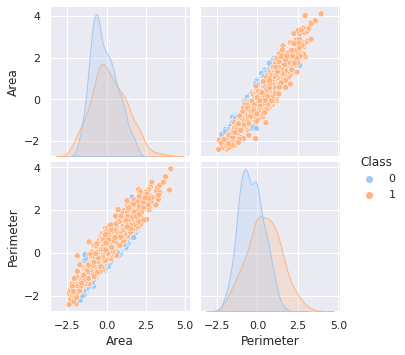

In [ ]:
_ = sns.pairplot(df, vars=['Area', 'Perimeter'], hue='Class', palette='pastel')

In [ ]:
import plotly.express as px

px.scatter(data_frame=df, x='Area', y='Perimeter', color='Class', opacity=0.5).show()

In [ ]:
px.scatter(data_frame=df, x='Eccentricity', y='Compactness', color='Class', opacity=0.5).show()
#_ = sns.pairplot(df, vars=['Compactness', 'Eccentricity'], hue='Class', palette='pastel')

### Zbadanie korelacji poszczególnych zmiennych

In [ ]:
corr = df.corr()
corr

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,1.000000,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.928548,1.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.789133,0.946181,1.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.685304,0.392913,0.099376,1.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.999806,0.929971,0.789061,0.685634,1.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.998464,0.928055,0.787078,0.690020,0.998289,1.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.159624,0.464601,0.704287,-0.590877,0.159156,0.156246,1.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.158388,0.065340,0.119291,0.090915,0.139178,0.159454,0.043991,1.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,-0.014018,-0.140600,-0.214990,0.233576,-0.015449,-0.010970,-0.327316,0.067537,1.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,-0.149378,-0.500968,-0.684972,0.558566,-0.153615,-0.145313,-0.890651,0.200836,0.352338,1.000000,-0.935233,0.933308,-0.669514


<ipython-input-35-9e8e4d6e6809>:8: DeprecationWarning:

`np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations



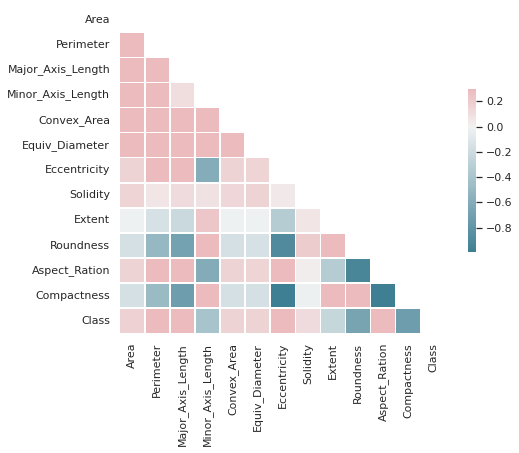

In [ ]:
# wizualizacja korelacji poszczególnych zmiennych (heatmap - mapa ciepła)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

sns.set(style="white") 
mask = np.zeros_like(corr, dtype=np.bool) # tablica nupmy, wymiar(kształt) jak corr, dane bool(False)
mask[np.triu_indices_from(mask)] = True # 'trójkąt' po przekątnej True
f, ax = plt.subplots(figsize=(8, 6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

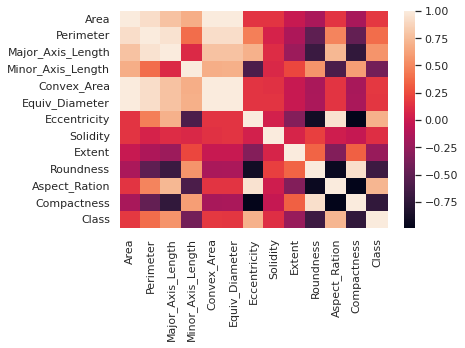

In [ ]:
# mapa ciepła z biblioteki sns
sns.heatmap(corr)

In [ ]:
#######################

In [ ]:
corr.columns

Index(['Area', 'Perimeter', 'Major_Axis_Length', 'Minor_Axis_Length',
       'Convex_Area', 'Equiv_Diameter', 'Eccentricity', 'Solidity', 'Extent',
       'Roundness', 'Aspect_Ration', 'Compactness', 'Class'],
      dtype='object')

In [ ]:
corr_df = pd.DataFrame(np.triu(corr, 1))
corr_df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
1,0.0,0.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
2,0.0,0.000000,0.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
3,0.0,0.000000,0.000000,0.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
4,0.0,0.000000,0.000000,0.000000,0.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352338,-0.329933,0.336984,-0.236076
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.935233,0.933308,-0.669514


In [ ]:
corr_df.columns = corr.columns
corr_df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,0.0,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
1,0.0,0.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
2,0.0,0.000000,0.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
3,0.0,0.000000,0.000000,0.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
4,0.0,0.000000,0.000000,0.000000,0.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
5,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
6,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
7,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
8,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352338,-0.329933,0.336984,-0.236076
9,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.935233,0.933308,-0.669514


In [ ]:
corr_df.index = df.corr().columns
corr_df

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
Area,0.0,0.928548,0.789133,0.685304,0.999806,0.998464,0.159624,0.158388,-0.014018,-0.149378,0.159960,-0.160438,0.170280
Perimeter,0.0,0.000000,0.946181,0.392913,0.929971,0.928055,0.464601,0.065340,-0.140600,-0.500968,0.487880,-0.484440,0.388345
Major_Axis_Length,0.0,0.000000,0.000000,0.099376,0.789061,0.787078,0.704287,0.119291,-0.214990,-0.684972,0.729156,-0.726958,0.561458
Minor_Axis_Length,0.0,0.000000,0.000000,0.000000,0.685634,0.690020,-0.590877,0.090915,0.233576,0.558566,-0.598475,0.603441,-0.401362
Convex_Area,0.0,0.000000,0.000000,0.000000,0.000000,0.998289,0.159156,0.139178,-0.015449,-0.153615,0.159822,-0.160432,0.168029
Equiv_Diameter,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.156246,0.159454,-0.010970,-0.145313,0.155762,-0.156411,0.160303
Eccentricity,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.043991,-0.327316,-0.890651,0.950225,-0.981689,0.699319
Solidity,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.067537,0.200836,0.026410,-0.019967,0.122674
Extent,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.352338,-0.329933,0.336984,-0.236076
Roundness,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.935233,0.933308,-0.669514


In [ ]:
# posortowanie współczynników korelacji (dla Class)
corr['Class'].sort_values(ascending=False) # wycięcie z corr kolumny Class i posortowanie malejąco

Class                1.000000
Aspect_Ration        0.721796
Eccentricity         0.699319
Major_Axis_Length    0.561458
Perimeter            0.388345
Area                 0.170280
Convex_Area          0.168029
Equiv_Diameter       0.160303
Solidity             0.122674
Extent              -0.236076
Minor_Axis_Length   -0.401362
Roundness           -0.669514
Compactness         -0.726676
Name: Class, dtype: float64

### Przygotowanie danych do modelu

In [ ]:
data = df.copy()
target = data.pop('Class')

data.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness
0,-1.784703,-2.215755,-2.320224,-0.238536,-1.793218,-1.921174,-2.729935,0.202812,0.855406,1.873763,-1.775063,2.197280
1,-0.294780,-0.568804,-0.700916,0.362089,-0.307244,-0.259343,-0.739163,0.603626,0.359523,0.938377,-0.824864,0.840230
2,-0.661350,-0.432940,-0.369395,-0.633215,-0.642749,-0.645380,0.310476,-1.085518,0.768380,-0.431615,0.074059,-0.211483
3,-1.039412,-1.265424,-1.334616,-0.140076,-1.045689,-1.057939,-1.075756,0.202812,0.761812,1.020648,-1.035351,1.098447
4,-1.065105,-1.209626,-1.293272,-0.229276,-1.045762,-1.086548,-0.934033,-1.285925,-0.295634,0.755950,-0.950840,0.972166


In [ ]:
target

0       0
1       0
2       0
3       0
4       0
       ..
2495    1
2496    1
2497    1
2498    1
2499    1
Name: Class, Length: 2500, dtype: int64

### <a name='3'></a> Podział danych na zbiór treningowy i testowy

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.values, target.values, test_size=0.2) # w postaci np.array
#X_train, X_test, y_train, y_test = train_test_split(data, target, test_size=0.2)

print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (2000, 12)
X_test shape: (500, 12)
y_train shape: (2000,)
y_test shape: (500,)


In [ ]:
X_train

array([[-0.56729229, -0.55295698, -1.01641785, ...,  0.15859063,
        -1.05022776,  1.10410098],
       [ 0.76262255,  0.10589126, -0.59591044, ...,  1.54289001,
        -1.59496234,  1.89948293],
       [-0.05118081,  0.07757604, -0.158928  , ..., -0.29747699,
        -0.25575722,  0.1617053 ],
       ...,
       [-0.69663125, -0.0307047 ,  0.53104934, ..., -1.56731234,
         1.76871831, -1.60999858],
       [-0.44915246, -0.84370744, -1.09425586, ...,  1.38550197,
        -1.27432543,  1.42451551],
       [-0.95084415, -0.28601766,  0.36362041, ..., -1.56552384,
         1.8772854 , -1.67408148]])

In [ ]:
y_train

array([0, 0, 0, ..., 1, 0, 1])

## <a name='4'></a> Model SVM

In [ ]:
from sklearn.svm import SVC
# support-vector machines

classifier_linear = SVC(gamma=0.001, kernel='linear') # C zawęża(C>1) / poszerza(C<1) pas;  klasyfikator liniowy
classifier_linear.fit(X_train, y_train) # dopasowanie danych do modelu

SVC(gamma=0.001, kernel='linear')

In [ ]:
classifier_linear.score(X_test, y_test)
# 0.876
# 0.89
# 0.9

0.864

In [ ]:
# model nieliniowy
classifier_rbf = SVC(gamma=0.001, kernel='rbf')
classifier_rbf.fit(X_train, y_train)

SVC(gamma=0.001)

In [ ]:
classifier_rbf.score(X_test, y_test)
# 0.876
# 0.876
# 0.898

0.856

## <a name='5'></a> TensorFlow

In [ ]:
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras.models import Sequential # do budowania modeli (warstwa po warstwie)
from tensorflow.keras.layers import Flatten, Dense, Dropout # potrzebne warstwy

import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go

### Model

In [ ]:
model = Sequential()

# model.add(Flatten(input_shape=(12,)))
# model.add(Dense(units=64, activation='relu'))

# to co powyżej
model.add(Dense(units=32, activation='relu', input_shape=(12,))) 

model.add(Dense(units=32, activation='relu'))

model.add(Dense(units=1, activation='sigmoid')) # 1 bo problem binarny; sigmoid - zwróci prawdopodobieństwo
                                                 


# kompilacja modelu (parametry: optymalizator, funkcja straty, 
                              # metryka (na nią patrzymy przy trenowaniu modelu))
model.compile(optimizer='adam',
              loss='binary_crossentropy', # bo problem wieloklasowy
              metrics=['accuracy'])


# info o modelu
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                416       
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 1)                 33        
                                                                 
Total params: 1,505
Trainable params: 1,505
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(X_train, y_train, epochs=10, validation_split=0.3) # epochs=5 (epoki) -> krotność przejścia całego zbioru przez sieć
                                                # ile razy zbiór danych przejdzie przez sieć (ile iteracji)
                                                # 30% danych treningowych użyte będzie do walidacji

Epoch 1/10
44/44 [==============================] - 1s 7ms/step - loss: 0.5274 - accuracy: 0.7814 - val_loss: 0.3698 - val_accuracy: 0.8733
Epoch 2/10
44/44 [==============================] - 0s 3ms/step - loss: 0.3629 - accuracy: 0.8557 - val_loss: 0.2969 - val_accuracy: 0.8800
Epoch 3/10
44/44 [==============================] - 0s 3ms/step - loss: 0.3236 - accuracy: 0.8707 - val_loss: 0.2841 - val_accuracy: 0.8850
Epoch 4/10
44/44 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.8757 - val_loss: 0.2791 - val_accuracy: 0.8850
Epoch 5/10
44/44 [==============================] - 0s 3ms/step - loss: 0.3071 - accuracy: 0.8829 - val_loss: 0.2780 - val_accuracy: 0.8900
Epoch 6/10
44/44 [==============================] - 0s 4ms/step - loss: 0.3041 - accuracy: 0.8829 - val_loss: 0.2769 - val_accuracy: 0.8900
Epoch 7/10
44/44 [==============================] - 0s 4ms/step - loss: 0.2986 - accuracy: 0.8786 - val_loss: 0.2708 - val_accuracy: 0.8917
Epoch 8/10
44/44 [==

### <a name='a7'></a> Ocena modelu

In [ ]:
# przerzucane zbioru testowego przez sieć i sprawdzene dokładnosci
model.evaluate(X_test, y_test, verbose=2)

16/16 - 0s - loss: 0.3089 - accuracy: 0.8620 - 42ms/epoch - 3ms/step


[0.3088712692260742, 0.8619999885559082]

In [ ]:
# wyświetlenie metryk
metrics = pd.DataFrame(history.history)
metrics['epoch'] = history.epoch
metrics

,loss,accuracy,val_loss,val_accuracy,epoch
0,0.527385,0.781429,0.369822,0.873333,0
1,0.362897,0.855714,0.296887,0.880000,1
2,0.323571,0.870714,0.284142,0.885000,2
3,0.313644,0.875714,0.279147,0.885000,3
4,0.307149,0.882857,0.277975,0.890000,4
5,0.304072,0.882857,0.276854,0.890000,5
6,0.298606,0.878571,0.270814,0.891667,6
7,0.295996,0.886429,0.270438,0.895000,7
8,0.293087,0.881429,0.266194,0.895000,8
9,0.290273,0.880714,0.264941,0.895000,9


In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots

fig = make_subplots(rows=1, cols=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['accuracy'], name='accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['loss'], name='loss'), row=1, col=2)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_accuracy'], name='val_accuracy'), row=1, col=1)
fig.add_trace(go.Scatter(x=metrics['epoch'], y=metrics['val_loss'], name='val_loss'), row=1, col=2)

fig.update_xaxes(title_text='epochs')
fig.update_yaxes(title_text='accuracy')
fig.update_layout(width=1000, title='Accuracy and Loss')
fig.show()